In [1]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\amith\Downloads\Compressed\archive\city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
data_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


{'shape': (29531, 16),
 'columns': ['City',
  'Date',
  'PM2.5',
  'PM10',
  'NO',
  'NO2',
  'NOx',
  'NH3',
  'CO',
  'SO2',
  'O3',
  'Benzene',
  'Toluene',
  'Xylene',
  'AQI',
  'AQI_Bucket'],
 'head':         City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
 0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
 1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
 2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
 3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
 4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   
 
        O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
 0  133.36     0.00     0.02    0.00  NaN        NaN  
 1   34.06     3.68     5.50    3.77  NaN        NaN  
 2   30.70     6.80    16.40    2.25  NaN        NaN  
 3   36.08     4.43    10.14    1.00  NaN        NaN  
 4   39.31     7.01    1

In [4]:
df = df.dropna(subset="AQI")
df = df.drop(columns=["Date", "AQI_Bucket"], axis=1)
for col in df.columns:
    if df[col].isnull().sum()>0:
        df[col]=df[col].fillna(df[col].median())
df.isnull().sum()

print(list(df['City'].unique())) #lists out all city names
"""['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 
'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 
'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 
'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 
'Visakhapatnam']"""

['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']


"['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', \n'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', \n'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', \n'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', \n'Visakhapatnam']"

In [5]:
label_encoder = LabelEncoder()
df['City'] = LabelEncoder().fit_transform(df['City']) 
print(list(df['City'].unique()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25)]


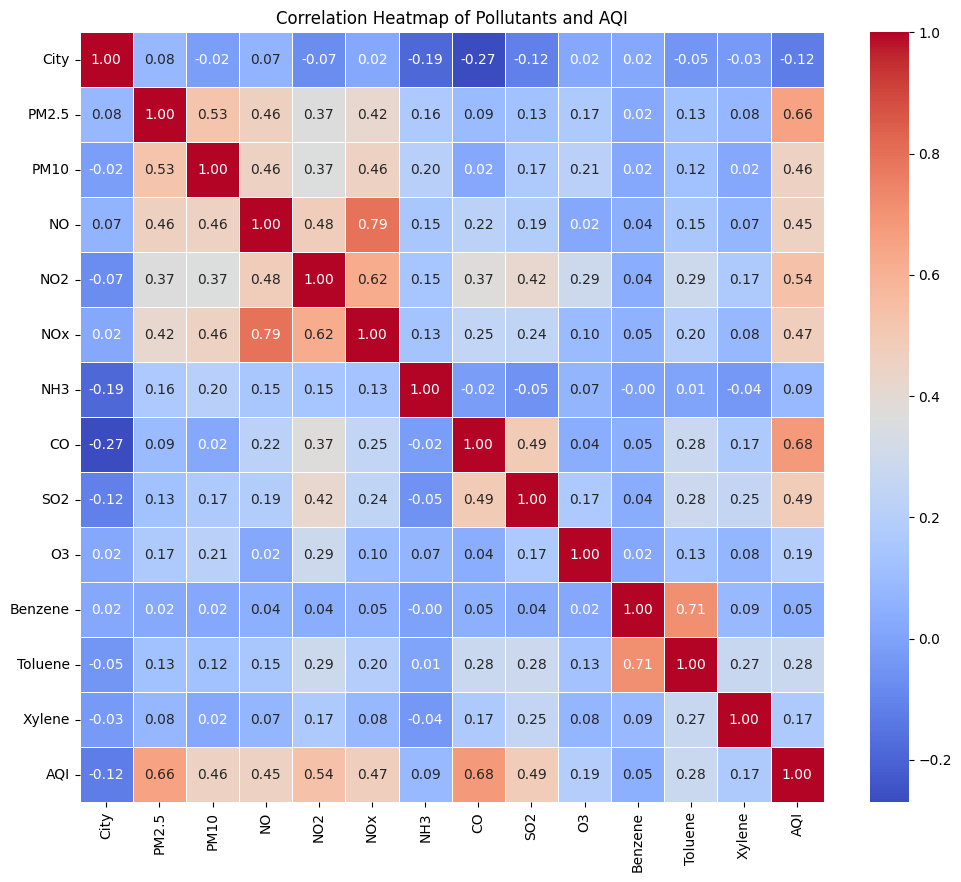

In [26]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

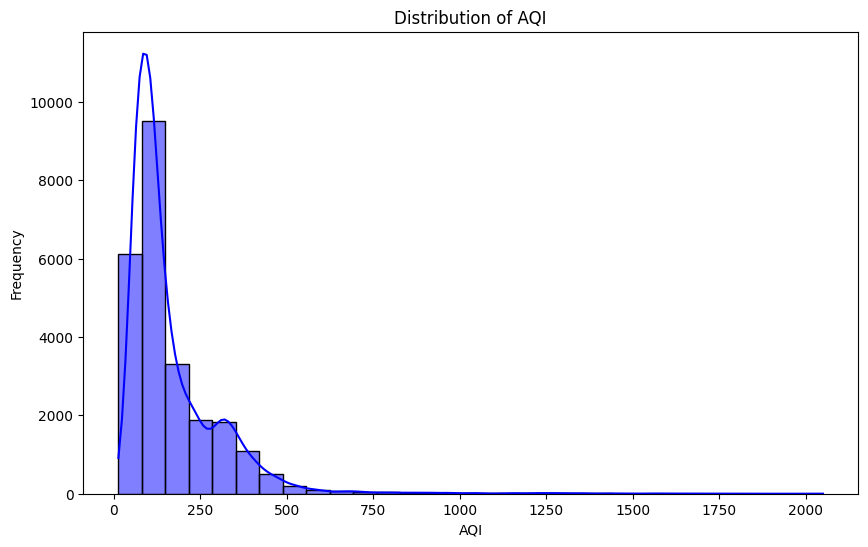

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df["AQI"], kde=True, bins=30, color="blue")
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

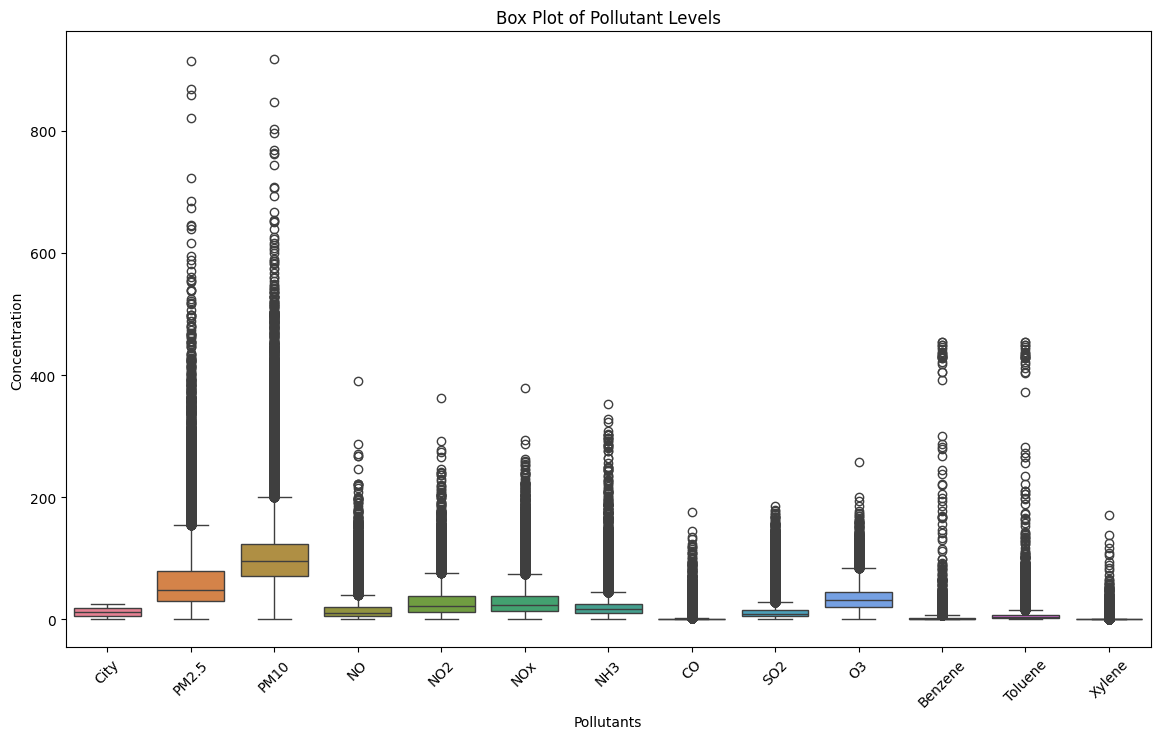

In [8]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df.drop(columns=["AQI"]))
plt.title("Box Plot of Pollutant Levels")
plt.xlabel("Pollutants")
plt.ylabel("Concentration")
plt.xticks(rotation=45)
plt.show()

In [31]:
x = df.drop(columns=["AQI"])
y = df["AQI"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='tanh', solver='adam',
                    max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2) 

Mean Absolute Error: 25.500680769189035
Mean Squared Error: 2447.631749627574
R-squared (R²) Score: 0.8722604378904761


C:\Users\amith\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


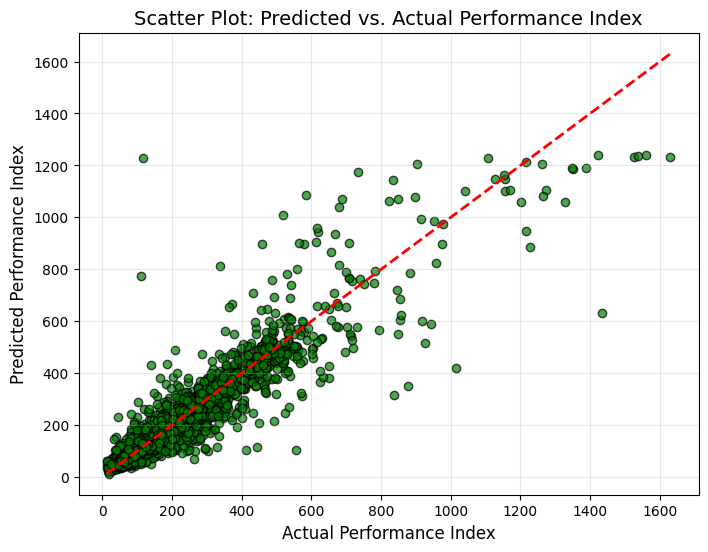

In [10]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Scatter Plot: Predicted vs. Actual Performance Index", fontsize=14)
plt.xlabel("Actual Performance Index", fontsize=12)
plt.ylabel("Predicted Performance Index", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

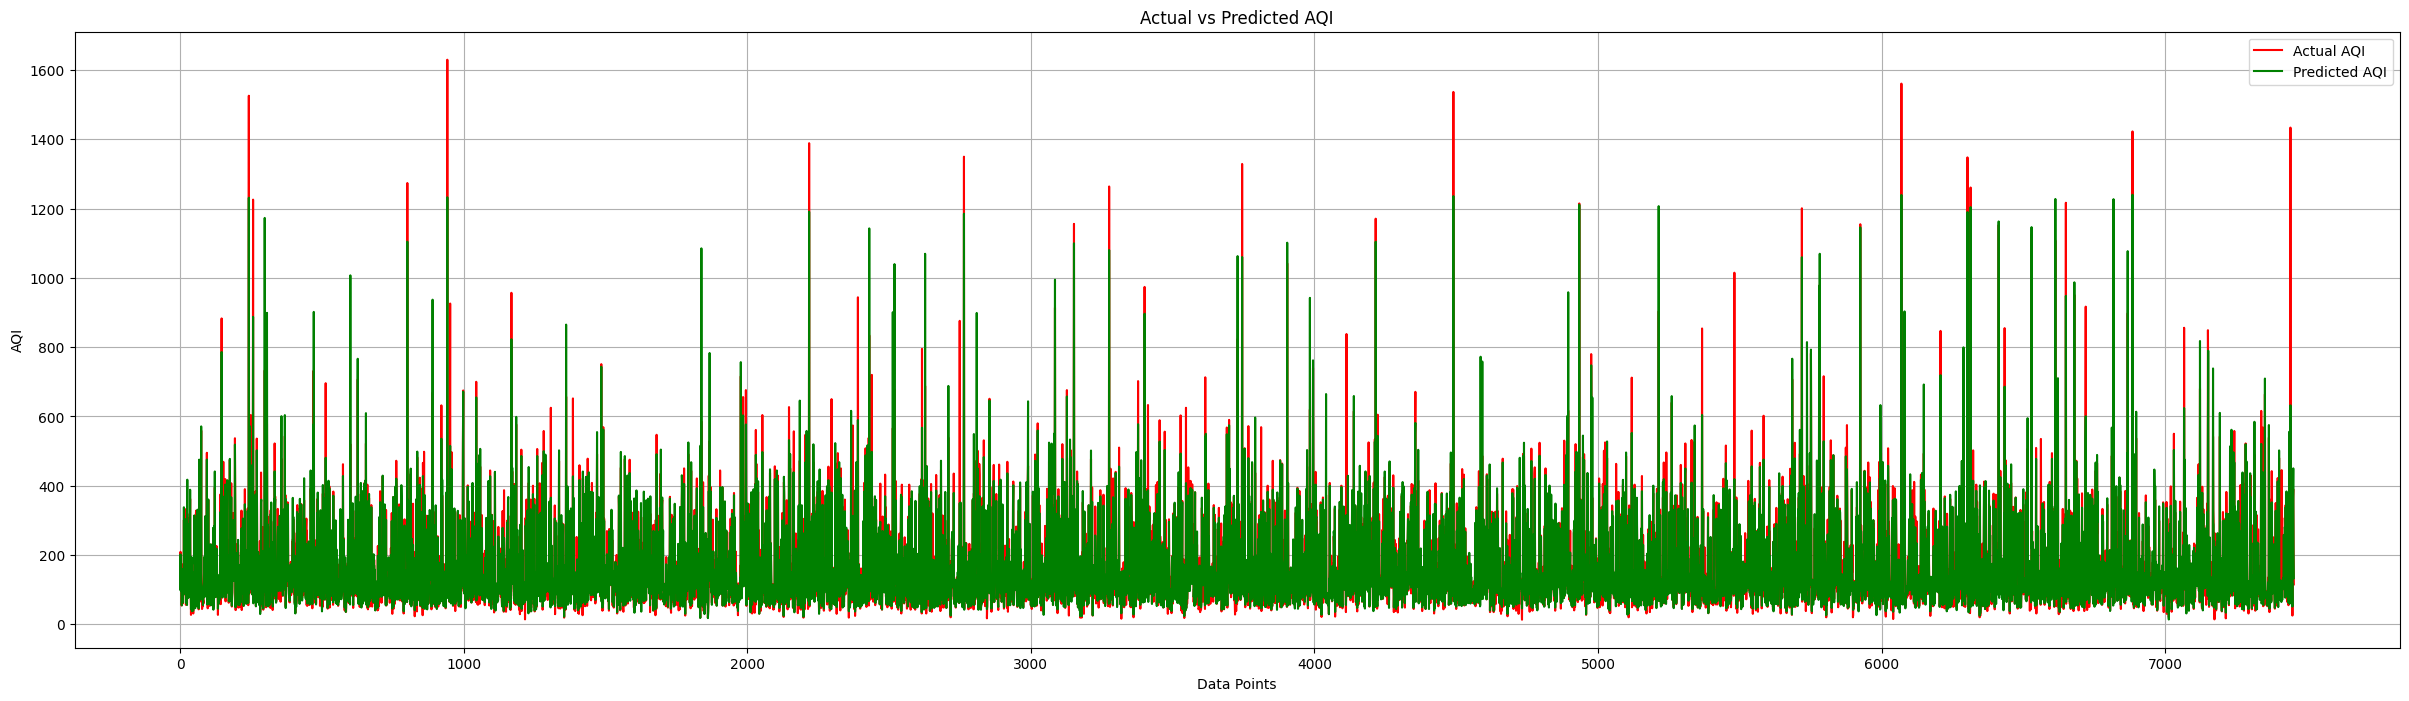

In [25]:
import matplotlib.pyplot as plt
import numpy as np
points = np.arange(len(y_test))
plt.figure(figsize=(30,8))
plt.plot(points, y_test.values, color='red', label='Actual AQI')
plt.plot(points, y_pred, color='green', label='Predicted AQI')
plt.title("Actual vs Predicted AQI")
plt.xlabel("Data Points")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.show()
